# Evolução de preços de passagens após cobrança por bagagem

![](imagens/noticia_inicio_cobranca.png)

*Fonte: https://exame.abril.com.br/seu-dinheiro/aereas-comecam-a-cobrar-pela-bagagem-em-voos-compare-as-mudancas/*

![](imagens/manchete.png)

*Fonte: http://economia.estadao.com.br/noticias/geral,apos-cobranca-por-bagagem-preco-das-passagens-aereas-sobe-no-pais,70002041735*

*Microdados da Anac: http://www.anac.gov.br/assuntos/dados-e-estatisticas/microdados-de-tarifas-aereas-comercializadas*

![](imagens/aviso_certificado_anac.png)

[Microdados da Anac](http://www.anac.gov.br/assuntos/dados-e-estatisticas/microdados-de-tarifas-aereas-comercializadas)

![](imagens/site_anac_microdados.png)

## Carregamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

Carregamento e exibição das cinco primeiras linhas

In [2]:
df_all = pd.read_csv('dados/2012-2017_1.CSV', sep=';', decimal=',')
df_all.head()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,TARIFA,ASSENTOS
0,2012,1,ABJ,SBSV,SNGI,626.86,47
1,2012,1,ABJ,SNGI,SBSV,626.86,43
2,2012,1,AZU,SBCT,SBSR,193.11,2
3,2012,1,AZU,SBPA,SBCG,611.91,2
4,2012,1,AZU,SBCB,SBCF,389.90,9


Informações gerais sobre o conjunto de dados

In [3]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27856209 entries, 0 to 27856208
Data columns (total 7 columns):
ANO         int64
MES         int64
EMPRESA     object
ORIGEM      object
DESTINO     object
TARIFA      float64
ASSENTOS    int64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.5+ GB


Lista de valores únicos

In [3]:
df_all.EMPRESA.unique() 

array(['ABJ', 'AZU', 'GLO', 'NHG', 'ONE', 'PTB', 'SLX', 'TAM', 'TIB',
       'TIM', 'WEB', 'PAM', 'FYW'], dtype=object)

[Códigos da OACI (Organização de Aviação Civil Internacional)](https://en.wikipedia.org/wiki/List_of_airline_codes)

In [4]:
df_all.ORIGEM.unique()

array(['SBSV', 'SNGI', 'SBCT', 'SBPA', 'SBCB', 'SBKP', 'SBPS', 'SBVT',
       'SBCF', 'SBRF', 'SBFZ', 'SBRJ', 'SBNF', 'SBEG', 'SBGO', 'SBJV',
       'SBML', 'SBDN', 'SBPJ', 'SBSL', 'SBUR', 'SBSJ', 'SBSR', 'SBBE',
       'SBNT', 'SBRP', 'SBFL', 'SBLO', 'SBZM', 'SBAR', 'SBAU', 'SBGL',
       'SBMG', 'SBBR', 'SBMO', 'SBTE', 'SBCG', 'SBJU', 'SBIP', 'SBCY',
       'SBJP', 'SBAE', 'SBFI', 'SBIL', 'SBCN', 'SBSP', 'SBGR', 'SBSN',
       'SBUL', 'SBMA', 'SBMK', 'SBIZ', 'SBMQ', 'SBRB', 'SBFN', 'SBPV',
       'SBPL', 'SBCZ', 'SBBV', 'SBCH', 'SBJI', 'SBCX', 'SBKG', 'SBCJ',
       'SNBR', 'SBQV', 'SWRD', 'SBAT', 'SBBH', 'SWSI', 'SWGN', 'SJRG',
       'SBCD', 'SBUG', 'SSER', 'SBNM', 'SBSM', 'SSZR', 'SBPF', 'SSJA',
       'SSFB', 'SBPK', 'SBCA', 'SWIQ', 'SBHT', 'SNDC', 'SDOW', 'SJHG',
       'SBAA', 'SWFX', 'SWGI', 'SBMD', 'SBCM', 'SWPI', 'SBLE', 'SBTB',
       'SBDO', 'SBVH', 'SBTU', 'SBCP', 'SBTT', 'SBIH', 'SBGV', 'SBTF',
       'SBDB', 'SBCR', 'SBME', 'SBJF', 'SBVG', 'SBAX', 'SSKW', 'SBUA',
      

*Designadores OACI de Aeródromos*

[Lista de códigos de aeródromos brasileiros aqui](http://www.anac.gov.br/assuntos/setor-regulado/aerodromos/aerodromos1)

## Formulação de hipótese

*Uma alternativa à formulação de hipóteses aqui seria a análise exploratória.*

Vamos restringir a análise às tarifas populares (que seriam, em tese, as beneficiadas pela cobrança de bagagem à parte) emitidas pela Gol. 

**O objetivo é checar qual foi a taxa de crescimento das tarifas (corrigidas pela inflação) entre os meses de Junho e Setembro desde 2012. Espera-se que, com a cobrança de bagagem, esse aumento tenha sido menor do que nos anos anteriores.**

## Transformações dos dados

In [3]:
# Vamos juntar as colunas *MES* e *ANO* em uma única coluna convertida para um datetime.
df_all['DTTM'] = pd.to_datetime(dict(year=df_all['ANO'], month=df_all['MES'], day=1))
df_gol = df_all[df_all['EMPRESA'] == 'GLO']

df_gol.head()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,TARIFA,ASSENTOS,DTTM
60481,2012,1,GLO,SBGR,SBMK,484.9,1,2012-01-01
60482,2012,1,GLO,SBPA,SBPV,1426.9,2,2012-01-01
60483,2012,1,GLO,SBAR,SBTE,565.9,1,2012-01-01
60484,2012,1,GLO,SBAR,SBMG,249.0,28,2012-01-01
60485,2012,1,GLO,SBFZ,SBMG,139.0,39,2012-01-01


Os dados não discriminam qual seria a tarifa popular, mas parece razoável considerar que ela seja a tarifa com maior número de assentos em cada trecho.

In [4]:
# Vamos manter apenas as tarifas com o maior número de assentos em cada vôo
df_gol_popular = df_gol.sort_values(
    'ASSENTOS', 
    ascending=False
).drop_duplicates(['DTTM', 'ORIGEM', 'DESTINO'])
df_gol_popular.head()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,TARIFA,ASSENTOS,DTTM
1505333,2012,6,GLO,SBRJ,SBSP,88.9,8480,2012-06-01
1536436,2012,6,GLO,SBSP,SBRJ,88.9,8285,2012-06-01
1878230,2012,7,GLO,SBSP,SBRJ,97.9,8114,2012-07-01
1850636,2012,7,GLO,SBRJ,SBSP,97.9,8109,2012-07-01
4167623,2013,2,GLO,SBVT,SBGR,129.0,8076,2013-02-01


Agora podemos tirar a mediana do valor das tarifas populares para cada mês ao longo de todos os trechos e plotar o resultado.

*Por que a mediana e não a média?*

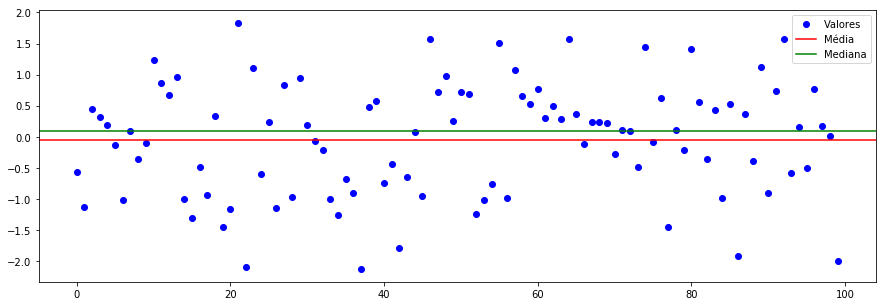

In [18]:
y = np.random.randn(100)
x = np.arange(len(y))

plt.figure(figsize=(15,5))
valores = plt.scatter(x, y, c='b', label='Valores')
media = plt.axhline(y=np.mean(y), color='r', label='Média')
mediana = plt.axhline(y=np.median(y), color='g', label='Mediana')
plt.ticklabel_format(useOffset=False)
plt.legend(handles=[valores, media, mediana])

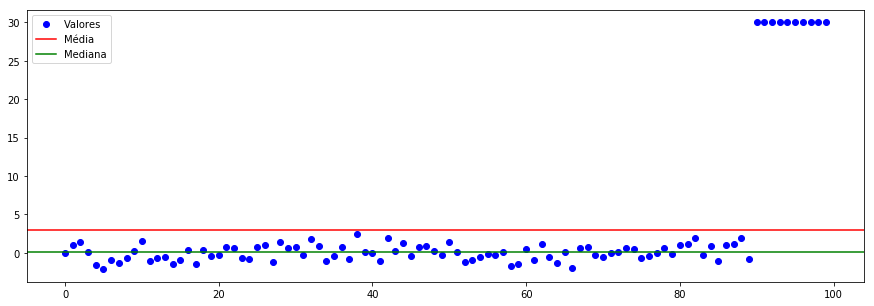

In [17]:
y = np.random.randn(100)
x = np.arange(len(y))
y[-10:] = 30

plt.figure(figsize=(15,5))
valores = plt.scatter(x, y, c='b', label='Valores')
media = plt.axhline(y=np.mean(y), color='r', label='Média')
mediana = plt.axhline(y=np.median(y), color='g', label='Mediana')
plt.ticklabel_format(useOffset=False)
plt.legend(handles=[valores, media, mediana])

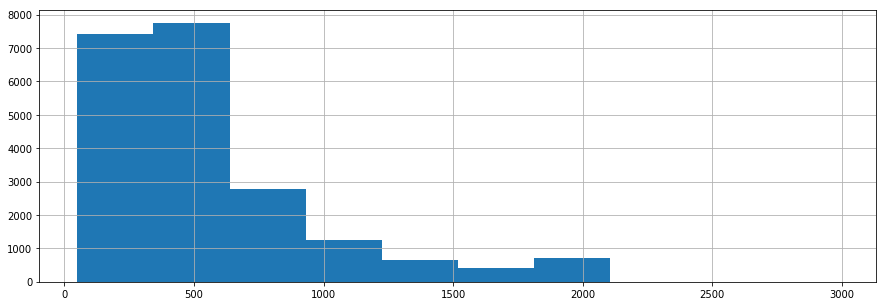

In [8]:
df_gol_popular_2017 = df_gol_popular[df_gol_popular['ANO']==2017]
df_gol_popular_2017['TARIFA'].hist(figsize=(15, 5))

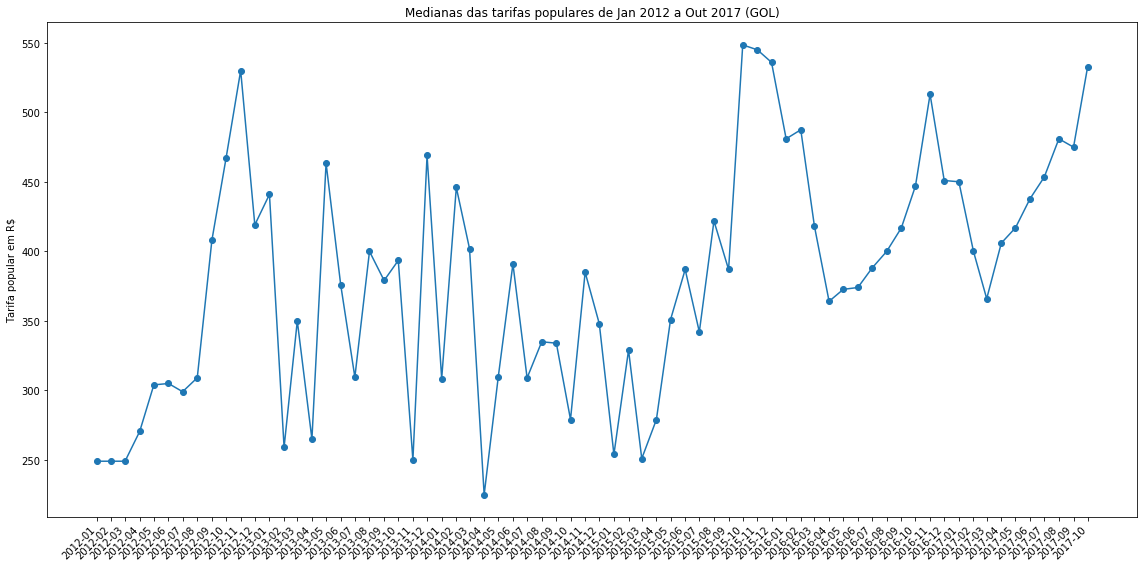

In [5]:
pivoted = pd.pivot_table(df_gol_popular, index=['DTTM'], values=['TARIFA'], aggfunc=np.median)

plt.rcParams["figure.figsize"] = (16, 8)
fig, ax = plt.subplots()
ax.set_xticks(pivoted.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_title('Medianas das tarifas populares de Jan 2012 a Out 2017 (GOL)')
ax.set_ylabel('Tarifa popular em R$')
fig.autofmt_xdate(rotation=45)
fig.tight_layout()

plt.plot_date(x=pivoted.index, y=pivo ted, ls='-');

*Precisamos corrigir pela inflação.*

## Combinando bases de dados

Precisamos corrigir esses preços pela inflação ao longo dos meses. Vamos usar a [base de dados](https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries) com a inflação acumulada mês a mês (IPCA) fornecida pelo Banco Central:

In [22]:
df_inflacao = pd.read_csv('dados/variacao_ipca.csv', sep=';', decimal=',')
df_inflacao.head()

,Data,Variacao
0,01/2012,0.56
1,02/2012,0.45
2,03/2012,0.21
3,04/2012,0.64
4,05/2012,0.36


In [23]:
df_inflacao['DTTM'] = pd.to_datetime(df_inflacao['Data'], format='%m/%Y')
df_inflacao.drop('Data', axis=1, inplace=True)
df_inflacao.head()

,Variacao,DTTM
0,0.56,2012-01-01
1,0.45,2012-02-01
2,0.21,2012-03-01
3,0.64,2012-04-01
4,0.36,2012-05-01


In [24]:
# Valores de "Variação" são porcentagens, logo devem ser divididos por 100
df_inflacao['Variacao'] = (df_inflacao['Variacao'] / 100.0) + 1.0
df_inflacao.head()

,Variacao,DTTM
0,1.0056,2012-01-01
1,1.0045,2012-02-01
2,1.0021,2012-03-01
3,1.0064,2012-04-01
4,1.0036,2012-05-01


O mês de Janeiro de 2012 será nossa base de preços, então podemos remover a variação da inflação nesse mês atribuindo o valor 1.0 a essa data:

In [25]:
df_inflacao_indexed = df_inflacao.set_index('DTTM')
df_inflacao_indexed.loc['2012-01-01', 'Variacao'] = 1.0
df_inflacao_indexed.head()

,Variacao
DTTM,
2012-01-01,1.0000
2012-02-01,1.0045
2012-03-01,1.0021
2012-04-01,1.0064
2012-05-01,1.0036


In [26]:
df_inflacao_indexed['Inflacao_acumulada'] = df_inflacao_indexed['Variacao'].cumprod()

Após tratar os dados brutos, podemos calcular a inflação acumulada desde Janeiro de 2012 para cada mês usando a fórmula abaixo

$i_{acumulada} = [(1 + \frac{i_1}{100})*(1 + \frac{i_2}{100})*\ldots*(1 + \frac{i_n}{100})]$

In [27]:
df_inflacao_indexed.head()

,Variacao,Inflacao_acumulada
DTTM,,
2012-01-01,1.0000,1.000000
2012-02-01,1.0045,1.004500
2012-03-01,1.0021,1.006609
2012-04-01,1.0064,1.013052
2012-05-01,1.0036,1.016699


In [28]:
df_inflacao_indexed.tail()

,Variacao,Inflacao_acumulada
DTTM,,
2017-06-01,0.9977,1.411803
2017-07-01,1.0024,1.415191
2017-08-01,1.0019,1.417880
2017-09-01,1.0016,1.420148
2017-10-01,1.0042,1.426113


*Inflação acumulada desde Janeiro de 2012 foi de cerca de 42%, o que está compatível com calculadoras online de IPCA acumulado.*

Dividimos então o valor da tarifa a cada mês pela inflação acumulada naquele mês:

In [29]:
pivoted['TARIFA_CORRIGIDA'] = pivoted['TARIFA'] / df_inflacao_indexed['Inflacao_acumulada']
pivoted.tail()

,TARIFA,TARIFA_CORRIGIDA
DTTM,,
2017-06-01,437.9,310.170822
2017-07-01,453.4,320.380779
2017-08-01,480.9,339.168365
2017-09-01,474.9,334.401653
2017-10-01,532.9,373.673026


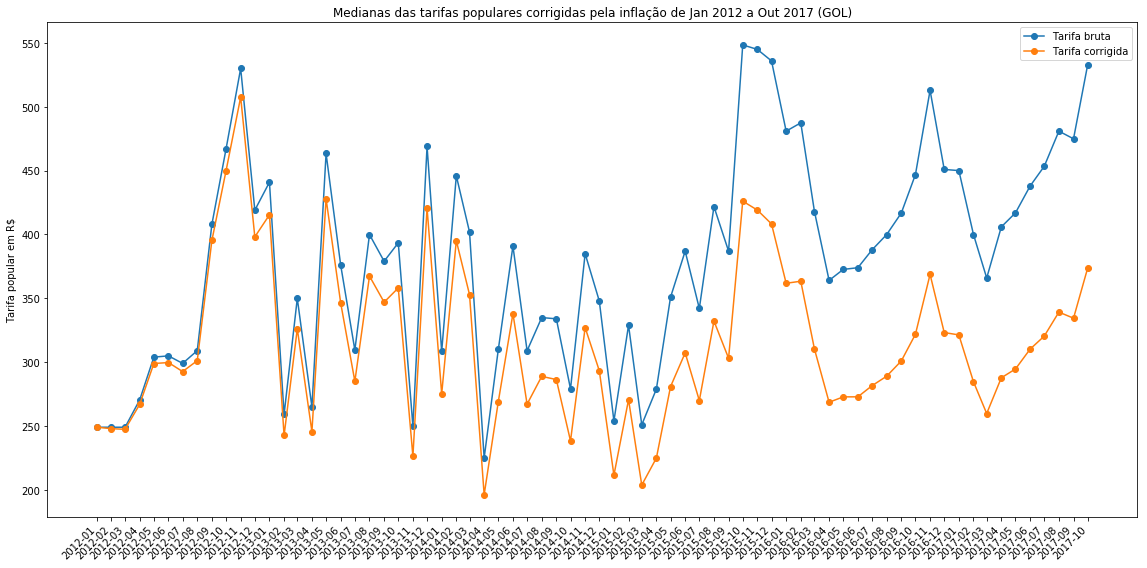

In [30]:
plt.rcParams["figure.figsize"] = (16, 8)
fig, ax = plt.subplots()
ax.set_xticks(pivoted.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_title('Medianas das tarifas populares corrigidas pela inflação de Jan 2012 a Out 2017 (GOL)')
ax.set_ylabel('Tarifa popular em R$')
fig.autofmt_xdate(rotation=45)
fig.tight_layout()

tarifa, = plt.plot_date(x=pivoted.index, y=pivoted['TARIFA'], ls='-', label='Tarifa bruta')
tarifa_corrigida, = plt.plot_date(x=pivoted.index, y=pivoted['TARIFA_CORRIGIDA'], ls='-', label='Tarifa corrigida')
plt.legend(handles=[tarifa, tarifa_corrigida])

#### Se olharmos então as taxas de crescimento das tarifas entre Junho e Setembro...

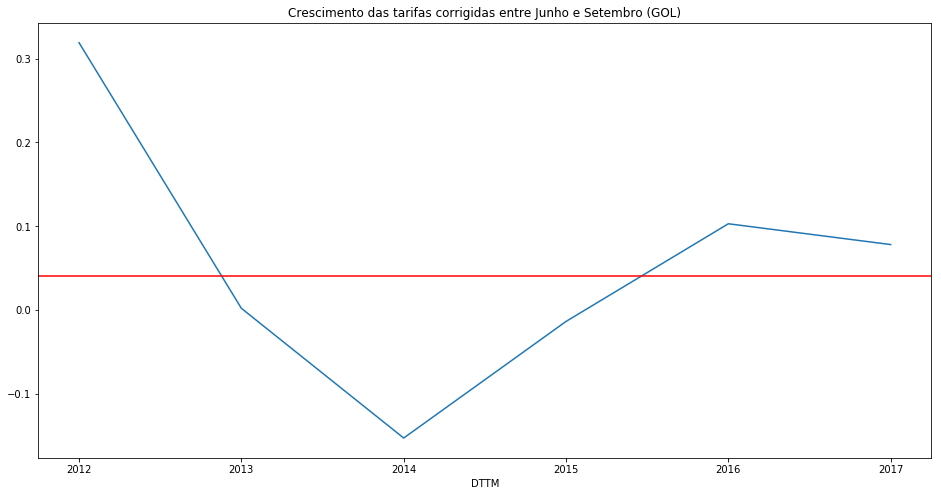

In [32]:
valores_junho = pivoted[pivoted.index.month == 6]['TARIFA_CORRIGIDA'].values
valores_setembro = pivoted[pivoted.index.month == 9]['TARIFA_CORRIGIDA'].values
derivadas_julho = pd.Series(index=pivoted_julho.index, data=(valores_setembro - valores_junho) / valores_junho)
derivadas_julho.plot(); plt.axhline(derivadas_julho.median(), color='r')
plt.title('Crescimento das tarifas corrigidas entre Junho e Setembro (GOL)');

*Os gráficos abaixo foram gerados repetindo os passos anteriores filtrando a companhia aérea com os identificadores **TAM** e **AZU** *

![](imagens/resultados_latam.png)

![](imagens/resultados_azul.png)

## Conclusões

* O preço mediano das tarifas da Gol apresentou em 2017 um aumento <span style="color:orange">levemente acima</span> dos aumentos tipicamente feitos entre Junho e Setembro (porém menor do que no ano anterior);


* O preço mediano das tarifas da Azul apresentou em 2017 um aumento <span style="color:red">acima</span> dos aumentos tipicamente feitos entre Junho e Setembro;


* O preço mediano das tarifas da Latam apresentou em 2017 um aumento <span style="color:blue">abaixo</span> dos aumentos tipicamente feitos entre Junho e Setembro;

**O que tiramos disso?**

* Aumentos poderiam ter sido ainda maiores sem cobrança de bagagem?
* A hipótese avaliada foi apropriada?
* Os valores observados podem ser aleatórios?

# Obrigado!